In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [3]:
from AFL.agent import xarray_extensions
from AFL.agent.util import composition_grid_ternary

In [4]:
grid = composition_grid_ternary(pts_per_row=100,basis=1.0)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
grid_base = xr.Dataset()
grid_base['a_grid'] = ('grid',grid[:,0])
grid_base['b_grid'] = ('grid',grid[:,1])
grid_base['c_grid'] = ('grid',grid[:,2])
grid_base.attrs['components'] = ['c','a','b']
grid_base.attrs['components_grid'] = ['c_grid','a_grid','b_grid']
grid_base

<xarray.Dataset>
Dimensions:  (grid: 5050)
Dimensions without coordinates: grid
Data variables:
    a_grid   (grid) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9798 0.9899 0.9899 1.0
    b_grid   (grid) float64 0.0 0.0101 0.0202 0.0303 ... 0.0202 0.0 0.0101 0.0
    c_grid   (grid) float64 1.0 0.9899 0.9798 0.9697 ... 0.0 0.0101 0.0 0.0
Attributes:
    components:       ['c', 'a', 'b']
    components_grid:  ['c_grid', 'a_grid', 'b_grid']

# Circle

In [5]:
center = [1/3,1/3,1/3]
abc = grid_base[['c_grid','a_grid','b_grid']].to_array('comp').transpose('grid',...)
dist = (abc - center).pipe(lambda x:np.square(x)).sum('comp').pipe(lambda x: np.sqrt(x))
labels = (dist<0.3).astype(int)

In [6]:
labels

<xarray.DataArray (grid: 5050)>
array([0, 0, 0, ..., 0, 0, 0])
Dimensions without coordinates: grid

In [22]:
ds_circle = grid_base.copy()
ds_circle['labels'] = labels

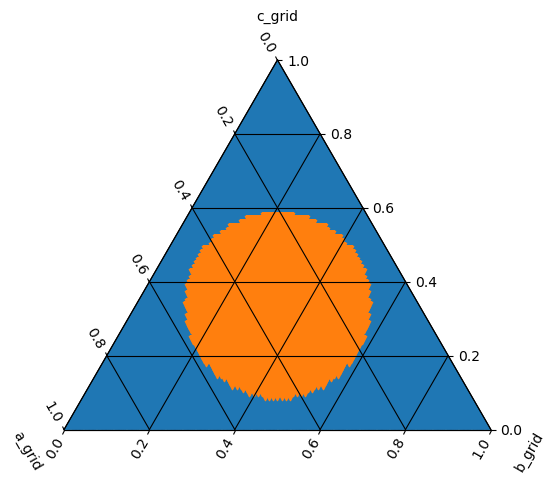

In [23]:
ds_circle.afl.comp.plot_scatter(grid_base.attrs['components_grid'] )

# Tri

In [7]:
center = [1/3,1/3,1/3]
abc = grid_base[['c_grid','a_grid','b_grid']].to_array('comp').transpose('grid',...)
dist = (abc - center).max('comp')
labels1 = (dist<0.1).astype(int)
labels2 = (abc<0.225).astype(int)
labels = labels2.any('comp')
print(labels.sum())

<xarray.DataArray ()>
array(4554)


In [8]:
labels = np.where(labels,'D','A')

In [9]:
ds = grid_base.copy()
ds = ds.rename({'a_grid':'a','b_grid':'b','c_grid':'c'})
ds['labels'] = ('grid',labels)

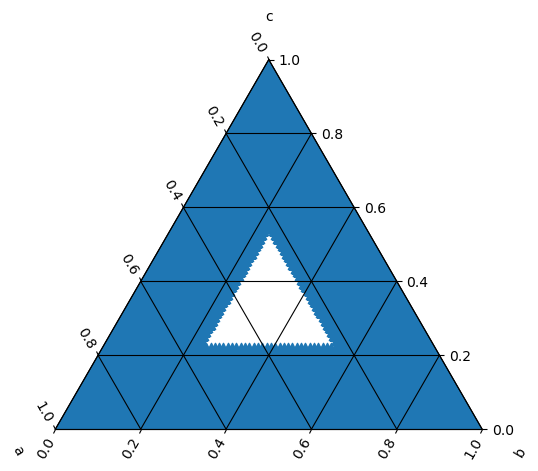

In [10]:
ds.where(ds.labels=='D',drop=True).afl.comp.plot_scatter(grid_base.attrs['components'] )

In [15]:
ds

<xarray.Dataset>
Dimensions:  (grid: 5050)
Dimensions without coordinates: grid
Data variables:
    a        (grid) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9798 0.9899 0.9899 1.0
    b        (grid) float64 0.0 0.0101 0.0202 0.0303 ... 0.0202 0.0 0.0101 0.0
    c        (grid) float64 1.0 0.9899 0.9798 0.9697 ... 0.0 0.0101 0.0 0.0
    labels   (grid) <U1 'D' 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D' 'D'
Attributes:
    components:       ['c', 'a', 'b']
    components_grid:  ['c_grid', 'a_grid', 'b_grid']

In [16]:
ds.to_netcdf('reference_data/triangle.nc')

# Tri2

In [9]:
abc = grid_base[['c_grid','a_grid','b_grid']].to_array('comp').transpose('grid',...)
labels = (abc[:,1]<0.4).astype(int)
labels = np.where(labels,'D','A')

In [10]:
ds = grid_base.copy()
ds = ds.rename({'a_grid':'a','b_grid':'b','c_grid':'c'})
ds['labels'] = ('grid',labels)

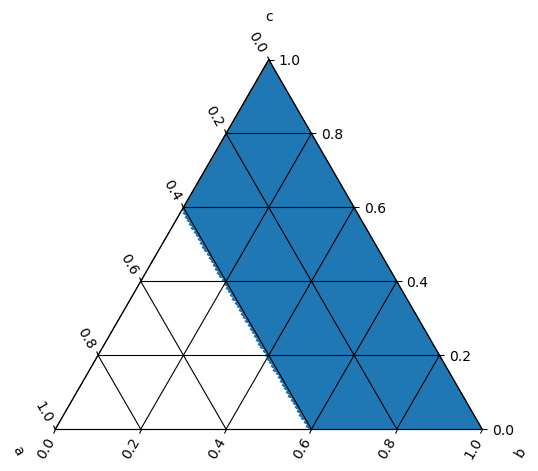

In [11]:
ds.where(ds.labels=='D',drop=True).afl.comp.plot_scatter(grid_base.attrs['components'] )

In [12]:
ds

<xarray.Dataset>
Dimensions:  (grid: 5050)
Dimensions without coordinates: grid
Data variables:
    a        (grid) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9798 0.9899 0.9899 1.0
    b        (grid) float64 0.0 0.0101 0.0202 0.0303 ... 0.0202 0.0 0.0101 0.0
    c        (grid) float64 1.0 0.9899 0.9798 0.9697 ... 0.0 0.0101 0.0 0.0
    labels   (grid) <U1 'D' 'D' 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A' 'A'
Attributes:
    components:       ['c', 'a', 'b']
    components_grid:  ['c_grid', 'a_grid', 'b_grid']

In [13]:
ds.to_netcdf('reference_data/triangleV2.nc')

# Tri2

In [57]:
center = [1/3,1/3,1/3]
abc = grid_base[['c_grid','a_grid','b_grid']].to_array('comp').transpose('grid',...)
dist = (abc - center)[:,0]
dist = (abc - center).sum('comp')
labels = (dist<0.0000005).astype(int)
print(labels.sum())

<xarray.DataArray ()>
array(5050)


In [52]:
ds_hex = grid_base.copy()
ds_hex['labels'] = labels

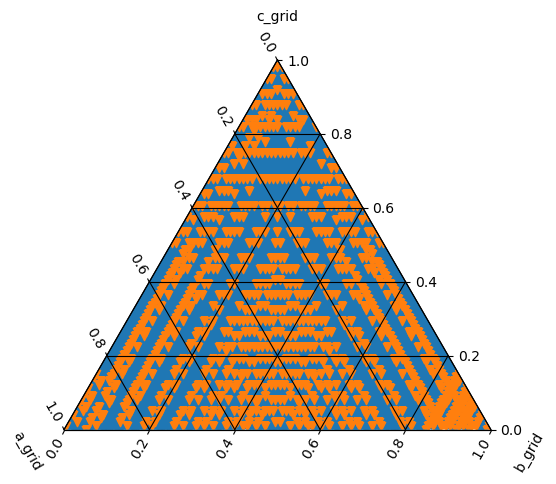

In [53]:
ds_hex.afl.comp.plot_scatter(grid_base.attrs['components_grid'] )

# Tri2

In [57]:
center = [1/3,1/3,1/3]
abc = grid_base[['c_grid','a_grid','b_grid']].to_array('comp').transpose('grid',...)
dist = (abc - center)[:,0]
dist = (abc - center).sum('comp')
labels = (dist<0.0000005).astype(int)
print(labels.sum())

<xarray.DataArray ()>
array(5050)


In [52]:
ds = grid_base.copy()
ds['labels'] = labels

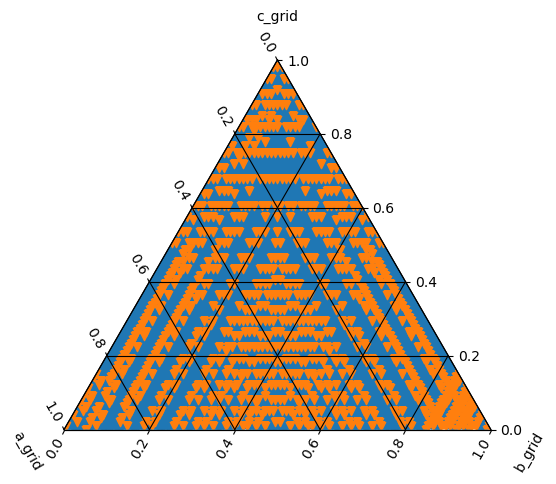

In [53]:
ds.afl.comp.plot_scatter(grid_base.attrs['components_grid'] )